<div class="output_png output_subarea output_execute_result">
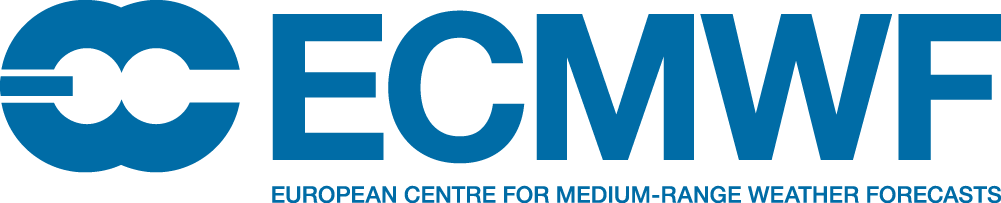
</div>

# 	Combined probabilities: 10m wind speed > 10 m/s and significant wave height > 2m

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-ens-wave-ws


<div class="output_png output_subarea output_execute_result">
<center>
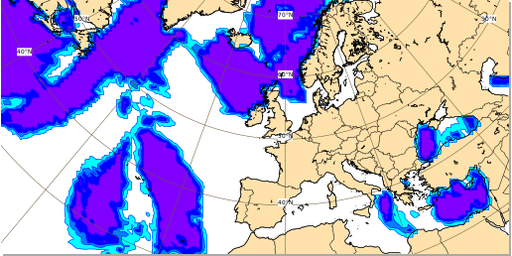</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 3 parameters :

* [Significant height of combined wind waves and swell](https://apps.ecmwf.int/codes/grib/param-db/?id=140229)
* [10 metre U wind component](https://apps.ecmwf.int/codes/grib/param-db/?id=165)
* [10 metre V wind component](https://apps.ecmwf.int/codes/grib/param-db/?id=166)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-data ecmwf-opendata magpye

In [2]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters_enfo = ['10u', '10v']
filename_enfo = 'medium-ens-wave-ws_enfo.grib'
filename_enfo

'medium-ens-wave-ws_enfo.grib'

In [5]:
parameters_wave = ['swh']
filename_wave = 'medium-ens-wave-ws_enfo_waef.grib'
filename_wave

'medium-ens-wave-ws_enfo_waef.grib'

We need to put both **cf** and **pf** as type **type** to download all 50 ensemble members as well as the control forecast.  
Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [6]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="enfo",
    type=['cf', 'pf'],
    levtype="sfc",
    param=parameters_enfo,
    target=filename_enfo
)

In [7]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="waef",
    type=['cf', 'pf'],
    levtype="sfc",
    param=parameters_wave,
    target=filename_wave
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

In [8]:
data_enfo = ecdata.read(filename_enfo)

In [9]:
data_wave = ecdata.read(filename_wave)

The **describe()** function will give us the overview of the dataset.  

In [10]:
data_enfo.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220124,0,12,"0,1,...",165,od,enfo,"cf,pf",0001
10v,heightAboveGround,10,20220124,0,12,"0,1,...",166,od,enfo,"cf,pf",0001


In [11]:
data_wave.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
swh,meanSea,0,20220124,0,12,"0,1,...",140229,od,waef,"cf,pf",0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [12]:
data_wave.describe('swh')

shortName,swh
name,Significant height of combined wind waves and swell
paramId,140229
units,m
typeOfLevel,meanSea
level,0
date,20220124
time,0
step,12
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [13]:
data_wave.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,swh,meanSea,0,20220124,0,12,pf,44,regular_ll
1,ecmf,swh,meanSea,0,20220124,0,12,pf,35,regular_ll
2,ecmf,swh,meanSea,0,20220124,0,12,pf,1,regular_ll
3,ecmf,swh,meanSea,0,20220124,0,12,pf,28,regular_ll
4,ecmf,swh,meanSea,0,20220124,0,12,pf,40,regular_ll
5,ecmf,swh,meanSea,0,20220124,0,12,pf,6,regular_ll
6,ecmf,swh,meanSea,0,20220124,0,12,pf,30,regular_ll
7,ecmf,swh,meanSea,0,20220124,0,12,pf,20,regular_ll
8,ecmf,swh,meanSea,0,20220124,0,12,pf,34,regular_ll


**ecmwf.data** library has a built in function to calculate the speed from u and v components. It takes u/v fieldsets as input and gives back speed intensity.
Note that we can give a fieldset on N u/v components, not just one pair.

In this case we will calculate all 51 ensemble members at the same time.


In [14]:
u = data_enfo.select(shortName= '10u')
v = data_enfo.select(shortName= '10v')

speed = ecdata.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10si,heightAboveGround,10,20220124,0,12,"0,1,...",207,od,enfo,"cf,pf",0001


In [15]:
mask = ecdata.Fieldset()
for number in range(51):
    swh_n = data_wave.select(number = number,)
    speed_n = speed.select(number = number)
    m = (swh_n > 2) & (speed_n >= 10)
    mask.append(m)

prob = (ecdata.mean(mask))*100

## Plotting the data
Each parameter has a dedicated style used at ECMWF web open charts.

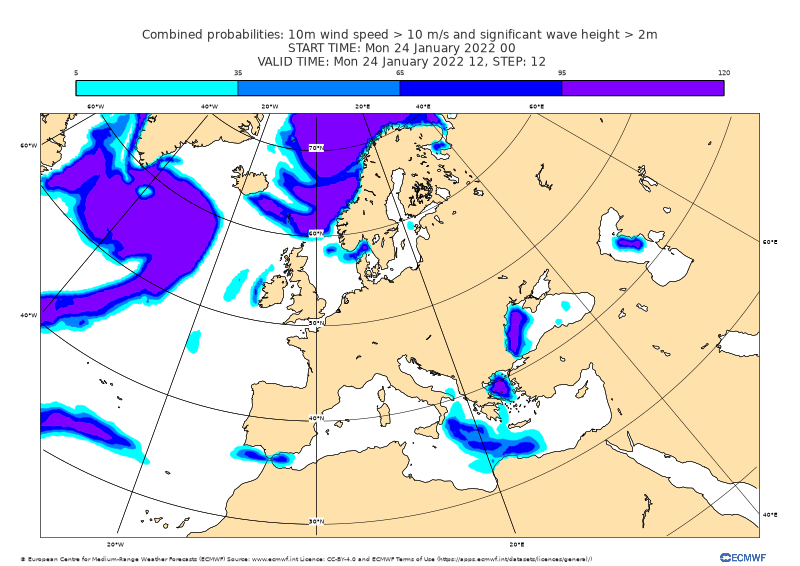

In [16]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")
fig.contour_shaded(prob, style="probability_blue")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Combined probabilities: 10m wind speed > 10 m/s and significant wave height > 2m",
           " START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           " VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"])
fig.legend()

fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.